# UIDAI Data Hackathon – Exploratory Data Analysis (EDA)

## Objective
This notebook focuses on:
- Cleaning and standardizing date fields
- Creating derived time features (month, year)
- Aggregating data to meaningful levels
- Exploring temporal, geographic, and demographic patterns
- Generating insights to support UIDAI decision-making

This notebook builds upon `01_data_understanding.ipynb`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 5)

print("EDA libraries loaded.")

EDA libraries loaded.


In [2]:
def load_and_combine(file_list):
    return pd.concat([pd.read_csv(f) for f in file_list], ignore_index=True)

# File paths (same as notebook 01)
enrolment_files = [
    "../data/raw/api_data_aadhar_enrolment/api_data_aadhar_enrolment_0_500000.csv",
    "../data/raw/api_data_aadhar_enrolment/api_data_aadhar_enrolment_500000_1000000.csv",
    "../data/raw/api_data_aadhar_enrolment/api_data_aadhar_enrolment_1000000_1006029.csv"
]

biometric_files = [
    "../data/raw/api_data_aadhar_biometric/api_data_aadhar_biometric_0_500000.csv",
    "../data/raw/api_data_aadhar_biometric/api_data_aadhar_biometric_500000_1000000.csv",
    "../data/raw/api_data_aadhar_biometric/api_data_aadhar_biometric_1000000_1500000.csv",
    "../data/raw/api_data_aadhar_biometric/api_data_aadhar_biometric_1500000_1861108.csv"
]

demographic_files = [
    "../data/raw/api_data_aadhar_demographic/api_data_aadhar_demographic_0_500000.csv",
    "../data/raw/api_data_aadhar_demographic/api_data_aadhar_demographic_500000_1000000.csv",
    "../data/raw/api_data_aadhar_demographic/api_data_aadhar_demographic_1000000_1500000.csv",
    "../data/raw/api_data_aadhar_demographic/api_data_aadhar_demographic_1500000_2000000.csv",
    "../data/raw/api_data_aadhar_demographic/api_data_aadhar_demographic_2000000_2071700.csv"
]

enrolment_df = load_and_combine(enrolment_files)
biometric_df = load_and_combine(biometric_files)
demographic_df = load_and_combine(demographic_files)

print("All datasets loaded for EDA.")

All datasets loaded for EDA.


In [3]:
# UIDAI datasets use DD-MM-YYYY date format (Indian standard)
for df in [enrolment_df, biometric_df, demographic_df]:
    df["date"] = pd.to_datetime(df["date"], dayfirst=True)

In [4]:
for df in [enrolment_df, biometric_df, demographic_df]:
    df["year"] = df["date"].dt.year
    df["month"] = df["date"].dt.month
    df["year_month"] = df["date"].dt.to_period("M").astype(str)

In [5]:
def time_range(df, name):
    print(f"{name}: {df['date'].min().date()} → {df['date'].max().date()}")

time_range(enrolment_df, "Enrolment")
time_range(biometric_df, "Biometric")
time_range(demographic_df, "Demographic")

Enrolment: 2025-03-02 → 2025-12-31
Biometric: 2025-03-01 → 2025-12-29
Demographic: 2025-03-01 → 2025-12-29


- Dates span from March 2025 to December 2025

## National-Level Monthly Analysis

This section analyzes Aadhaar activity at a national level by aggregating
data monthly across all states and districts. The objective is to:

- Understand overall enrolment behavior across age groups
- Examine biometric update workload over time
- Analyze demographic update patterns for existing Aadhaar holders
- Identify high-level temporal patterns to support UIDAI planning

In [6]:
# National monthly enrolment aggregation
enrol_monthly_nat = (enrolment_df.groupby("year_month")[["age_0_5", "age_5_17", "age_18_greater"]].sum().reset_index())

In [7]:
enrol_monthly_nat.head()

,year_month,age_0_5,age_5_17,age_18_greater
0,2025-03,5367,7407,3808
1,2025-04,141154,91371,24913
2,2025-05,95342,71690,16584
3,2025-06,98943,99911,16880
4,2025-07,318352,263333,35183


In [8]:
# National monthly biometric aggregation
bio_monthly_nat = (biometric_df.groupby("year_month")[["bio_age_5_17", "bio_age_17_"]].sum().reset_index())

In [9]:
bio_monthly_nat.head()

,year_month,bio_age_5_17,bio_age_17_
0,2025-03,3733578,4588644
1,2025-04,4356896,4284783
2,2025-05,3868247,4011709
3,2025-06,3710149,4189140
4,2025-07,4499057,5293495


In [10]:
# National monthly demographic aggregation
demo_monthly_nat = (demographic_df.groupby("year_month")[["demo_age_5_17", "demo_age_17_"]].sum().reset_index())

In [11]:
demo_monthly_nat.head()

,year_month,demo_age_5_17,demo_age_17_
0,2025-03,976095,10171463
1,2025-04,198744,1316928
2,2025-05,204893,1361394
3,2025-06,197767,1487795
4,2025-07,288449,1932266


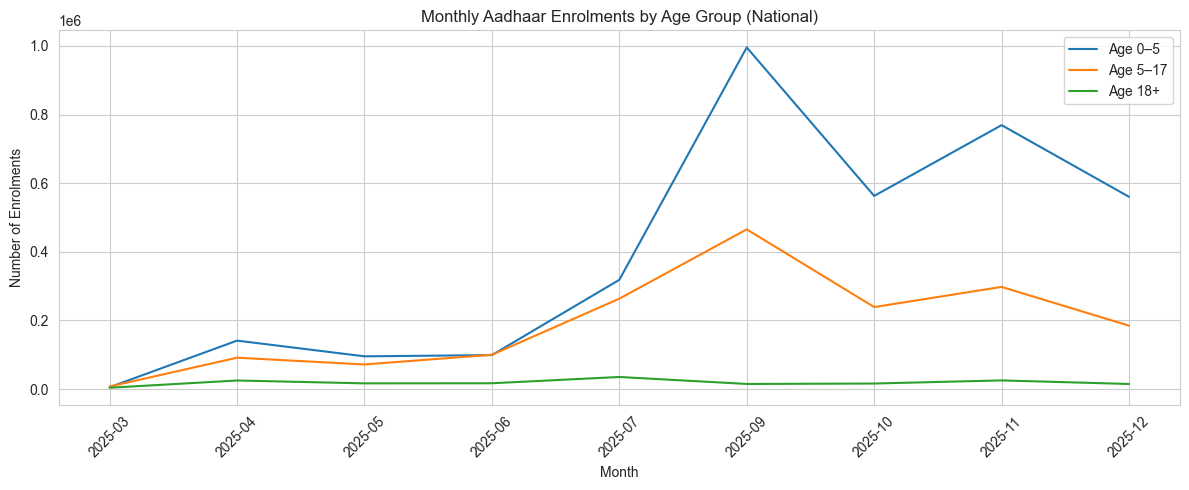

In [12]:
plt.plot(enrol_monthly_nat["year_month"], enrol_monthly_nat["age_0_5"], label="Age 0–5")
plt.plot(enrol_monthly_nat["year_month"], enrol_monthly_nat["age_5_17"], label="Age 5–17")
plt.plot(enrol_monthly_nat["year_month"], enrol_monthly_nat["age_18_greater"], label="Age 18+")

plt.title("Monthly Aadhaar Enrolments by Age Group (National)")
plt.xlabel("Month")
plt.ylabel("Number of Enrolments")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.savefig("../visuals/charts/national_enrolment_trends.png")
plt.show()

### Interpretation – National Aadhaar Enrolment Trends by Age Group

- The chart clearly shows that Aadhaar enrolments at the national level are
mainly driven by children rather than adults.

- Enrolments for the **0–5 age group** are the highest in every month. This
indicates that most new Aadhaar IDs are being created for newborns and
young children, likely linked to birth registration and early identity
creation.

- The **5–17 age group** is the second largest contributor. These enrolments
are steady and follow a similar pattern to the 0–5 group, which suggests
school-age children form a major part of new Aadhaar enrolments.

- In contrast, **adult enrolments (18+) remain very low** throughout the
entire period and show little variation. This strongly suggests that
Aadhaar coverage among adults is already saturated, and very few new adult
IDs are being created.

Overall, this trend indicates that Aadhaar has moved beyond large-scale
adult enrolment. The system is now primarily supporting child enrolment,
while future operational focus is expected to shift more towards updates
(biometric and demographic) rather than new adult registrations.

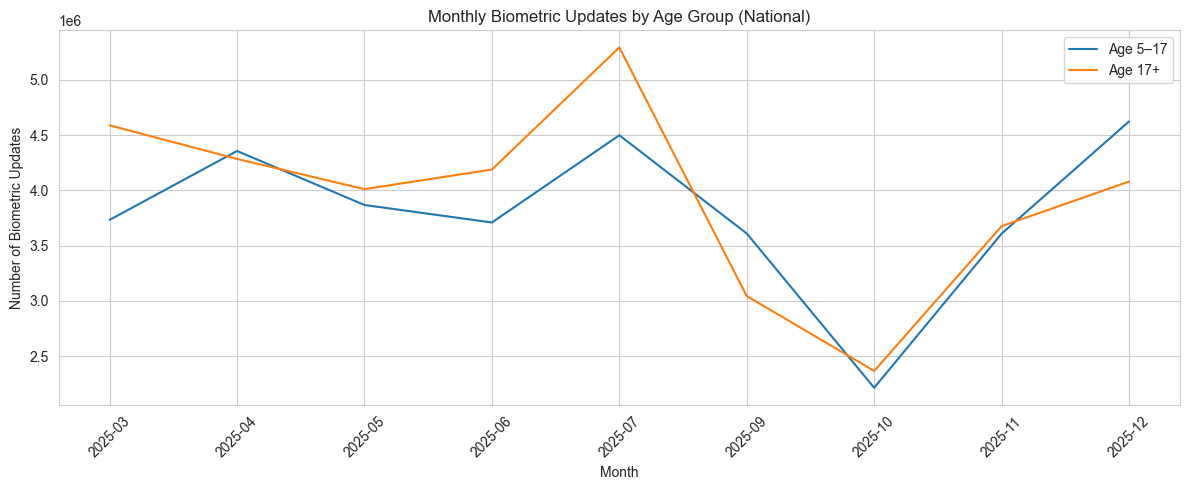

In [13]:
plt.plot(bio_monthly_nat["year_month"], bio_monthly_nat["bio_age_5_17"], label="Age 5–17")
plt.plot(bio_monthly_nat["year_month"], bio_monthly_nat["bio_age_17_"], label="Age 17+")

plt.title("Monthly Biometric Updates by Age Group (National)")
plt.xlabel("Month")
plt.ylabel("Number of Biometric Updates")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.savefig("../visuals/charts/national_biometric_trends.png")
plt.show()

### Interpretation – National Biometric Update Trends by Age Group

- This chart shows that biometric updates remain consistently high across
all months, which highlights that biometric maintenance is a major and
ongoing part of Aadhaar operations.

- The **17+ age group** contributes a large share of biometric updates,
mainly due to mandatory biometric refresh requirements and corrections
for adults. Their update volume remains high throughout the year, with
some noticeable monthly fluctuations.

- The **5–17 age group** also shows a strong and steady level of biometric
updates. This is expected, as children are required to update their
biometrics at specific age milestones, especially around adolescence.

- A clear dip in biometric updates is visible around **October**, followed
by a sharp recovery in the subsequent months. This pattern may reflect
seasonal or operational factors such as reduced activity periods or
temporary service constraints.

Overall, the trend confirms that biometric updates are not occasional
events. They form a continuous and predictable workload for UIDAI,
independent of new Aadhaar enrolments.


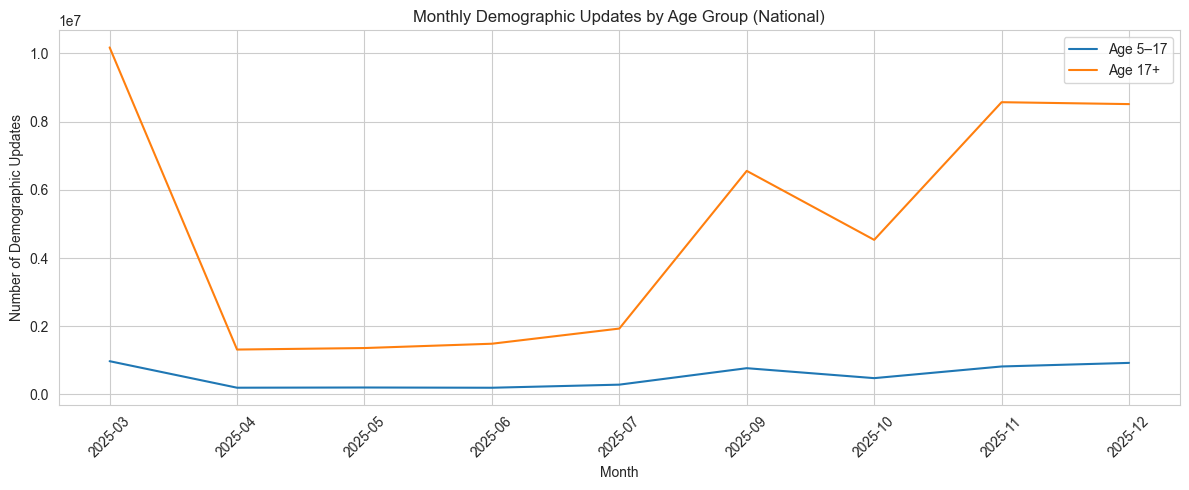

In [14]:
plt.plot(demo_monthly_nat["year_month"], demo_monthly_nat["demo_age_5_17"], label="Age 5–17")
plt.plot(demo_monthly_nat["year_month"], demo_monthly_nat["demo_age_17_"], label="Age 17+")

plt.title("Monthly Demographic Updates by Age Group (National)")
plt.xlabel("Month")
plt.ylabel("Number of Demographic Updates")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.savefig("../visuals/charts/national_demographic_trends.png")
plt.show()

### Interpretation – National Demographic Update Trends by Age Group

- This chart shows that **demographic updates are dominated by adult Aadhaar
holders (17+)** throughout the year. Adult updates are significantly higher
than those for the 5–17 age group in every month.

- A very high number of demographic updates for adults is visible at the
beginning of the period, followed by a sharp drop and then a gradual
increase in later months. This pattern suggests that adult users frequently
update information such as address, name, or date of birth, possibly due to
relocation, document corrections, or service-related requirements.

- Demographic updates for the **5–17 age group** remain comparatively low and
stable, with a slight increase in the later months. This is expected, as
children typically require fewer demographic changes compared to adults.

Overall, the trend highlights that demographic updates form a **major and
continuous workload**, especially for adults. Along with biometric updates,
this reinforces that Aadhaar operations are not limited to enrolment but
require sustained capacity for ongoing data maintenance.


## Cross-Dataset Pattern Summary

The combined analysis of enrolment, biometric updates, and demographic
updates shows a clear shift in how the Aadhaar system is being used.

- New Aadhaar enrolments are mainly driven by children, while adult
enrolments remain consistently low, indicating that Aadhaar coverage
among adults is largely complete.

- In contrast, biometric updates remain high and continuous for both
children and adults. This confirms that biometric maintenance is a
regular and ongoing operational requirement, independent of new
enrolments.

- Demographic updates are dominated by adults and show significant
monthly volumes, highlighting frequent changes such as address and
personal detail updates. This adds a steady, parallel workload alongside
biometric updates.

Overall, these patterns show that Aadhaar has evolved from a system
focused on enrolment to a **lifecycle identity platform**, where ongoing
biometric and demographic updates now form the core operational demand.

## State-Level Geographic Analysis

After understanding national-level trends, this section explores
state-wise patterns in Aadhaar enrolments, biometric updates, and
demographic updates. The objective is to identify regional concentration,
variation, and potential operational hotspots across states.

In [15]:
# State-wise total enrolments
state_enrolment = (enrolment_df.groupby("state")[["age_0_5", "age_5_17", "age_18_greater"]].sum().reset_index())
state_enrolment.head()

,state,age_0_5,age_5_17,age_18_greater
0,100000,0,1,217
1,Andaman & Nicobar Islands,109,5,0
2,Andaman and Nicobar Islands,370,27,0
3,Andhra Pradesh,112440,13746,1495
4,Arunachal Pradesh,1957,2236,151


In [16]:
# State-wise total biometric updates
state_biometric = (biometric_df.groupby("state")[["bio_age_5_17", "bio_age_17_"]].sum().reset_index())
state_biometric.head()

,state,bio_age_5_17,bio_age_17_
0,Andaman & Nicobar Islands,405,1979
1,Andaman and Nicobar Islands,11401,6913
2,Andhra Pradesh,2241448,1473144
3,Arunachal Pradesh,42894,29500
4,Assam,596624,386098


In [17]:
# State-wise total demographic updates
state_demographic = (demographic_df.groupby("state")[["demo_age_5_17", "demo_age_17_"]].sum().reset_index())
state_demographic.head()

,state,demo_age_5_17,demo_age_17_
0,100000,0,2
1,Andaman & Nicobar Islands,13,1046
2,Andaman and Nicobar Islands,604,5583
3,Andhra Pradesh,321143,1974362
4,Arunachal Pradesh,5783,30660


In [18]:
# Top 10 States by Total Enrolments
state_enrolment["total_enrolments"] = (state_enrolment["age_0_5"] + state_enrolment["age_5_17"] + state_enrolment["age_18_greater"])

top_enrol_states = state_enrolment.sort_values("total_enrolments", ascending=False).head(10)

print("Top 10 States by Total Enrolments")
top_enrol_states

Top 10 States by Total Enrolments


,state,age_0_5,age_5_17,age_18_greater,total_enrolments
45,Uttar Pradesh,521045,479682,17902,1018629
6,Bihar,262875,334802,11908,609585
27,Madhya Pradesh,367990,116381,9599,493970
51,West Bengal,275391,91396,8510,375297
28,Maharashtra,278814,82116,8209,369139
39,Rajasthan,229780,113123,5555,348458
16,Gujarat,193031,71182,16336,280549
5,Assam,141235,66085,22877,230197
23,Karnataka,179262,33863,10110,223235
41,Tamil Nadu,182313,37227,1249,220789


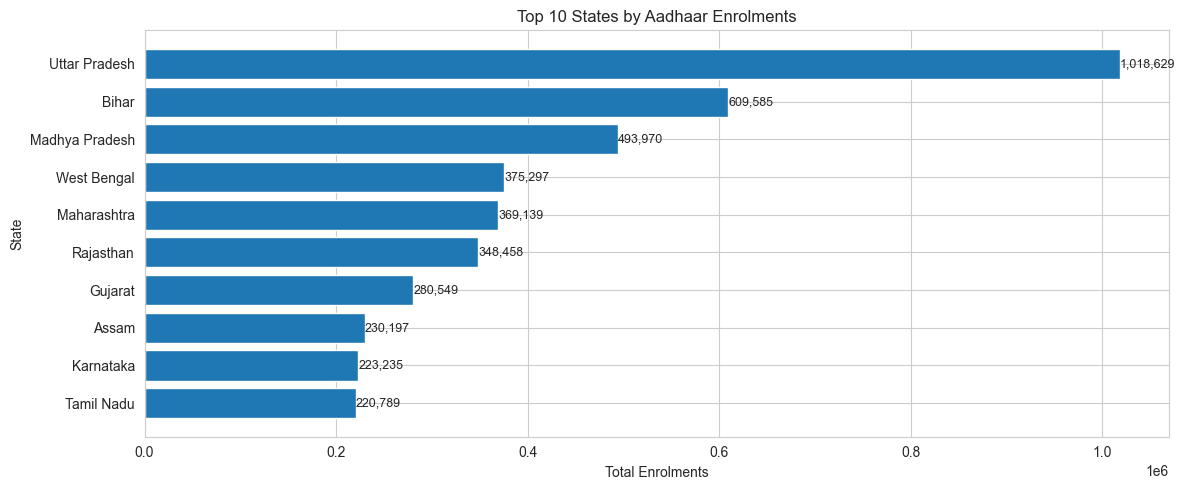

In [19]:
bars = plt.barh(top_enrol_states["state"], top_enrol_states["total_enrolments"])

plt.title("Top 10 States by Aadhaar Enrolments")
plt.xlabel("Total Enrolments")
plt.ylabel("State")
plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f"{int(width):,}", va="center", ha="left", fontsize=9)

plt.tight_layout()
plt.savefig("../visuals/charts/state_enrolment_top10.png")
plt.show()

### Interpretation – Top 10 States by Aadhaar Enrolments

- The chart shows that Aadhaar enrolments are highly concentrated in a few
large states. **Uttar Pradesh** stands out clearly, with enrolments much
higher than any other state. This reflects its large population and
higher number of new Aadhaar registrations, especially among children.

- **Bihar** and **Madhya Pradesh** follow next, indicating that central and
eastern states contribute significantly to new Aadhaar enrolments.
Other states such as **West Bengal, Maharashtra, and Rajasthan** also
show substantial enrolment volumes, though at a lower level compared to
the top two states.

- States like **Gujarat, Assam, Karnataka, and Tamil Nadu** appear at the
lower end of the top 10 list, suggesting comparatively fewer new
enrolments during this period.

Overall, the pattern indicates that new Aadhaar enrolments are largely
driven by high-population states, while several economically developed
states show lower enrolment volumes, likely because Aadhaar coverage in
those regions is already mature.

In [20]:
# Total Biometric Updates by State
state_biometric["total_biometric_updates"] = (state_biometric["bio_age_5_17"] + state_biometric["bio_age_17_"])

top_bio_states = state_biometric.sort_values("total_biometric_updates", ascending=False).head(10)

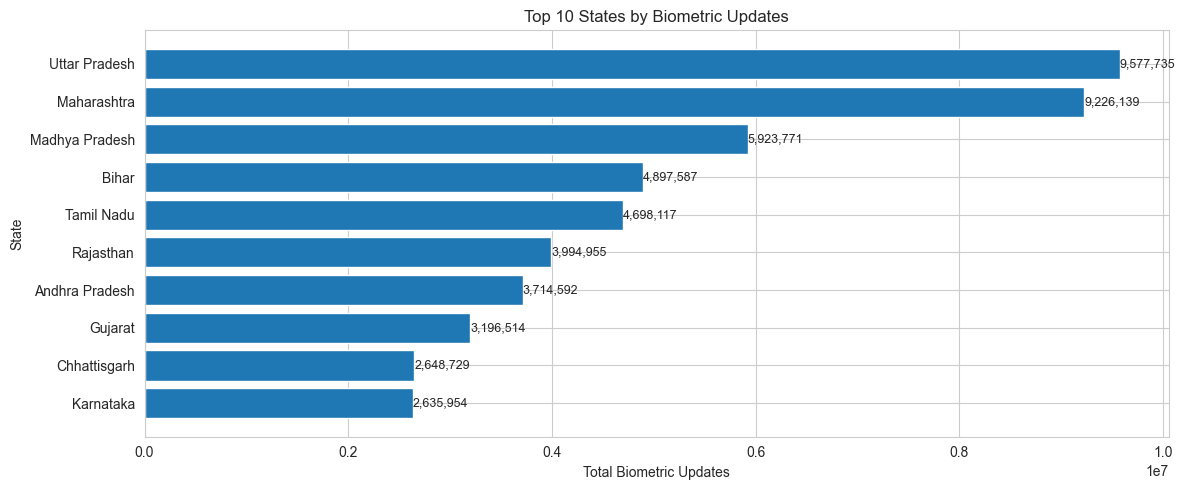

In [21]:
bars = plt.barh(top_bio_states["state"], top_bio_states["total_biometric_updates"])

plt.title("Top 10 States by Biometric Updates")
plt.xlabel("Total Biometric Updates")
plt.ylabel("State")
plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f"{int(width):,}", va="center", ha="left", fontsize=9)

plt.tight_layout()
plt.savefig("../visuals/charts/state_biometric_top10.png")
plt.show()

### Interpretation – Top 10 States by Biometric Updates

- The chart shows that biometric updates are heavily concentrated in a few
states, with **Uttar Pradesh** and **Maharashtra** leading by a wide
margin. These states generate very high biometric update volumes, which
reflects both their large Aadhaar user base and continuous lifecycle
update requirements.

- **Madhya Pradesh** and **Bihar** also show substantial biometric update
activity, indicating that high update workloads are not limited only to
the most urbanized states. **Tamil Nadu** and **Rajasthan** further add
to this significant workload, showing that biometric maintenance is a
nationwide operational demand.

- States such as **Andhra Pradesh, Gujarat, Chhattisgarh, and Karnataka**
appear lower in the top 10 but still contribute millions of biometric
updates, highlighting that even relatively smaller states experience
heavy update pressure.

Overall, the pattern confirms that biometric updates form a major and
ongoing workload across states, independent of new Aadhaar enrolments.
This emphasizes the need for strong, state-specific planning of biometric
infrastructure and resources.

In [22]:
# Total Demographic Updates by State
state_demographic["total_demographic_updates"] = (state_demographic["demo_age_5_17"] + state_demographic["demo_age_17_"])

top_demo_states = state_demographic.sort_values("total_demographic_updates", ascending=False).head(10)

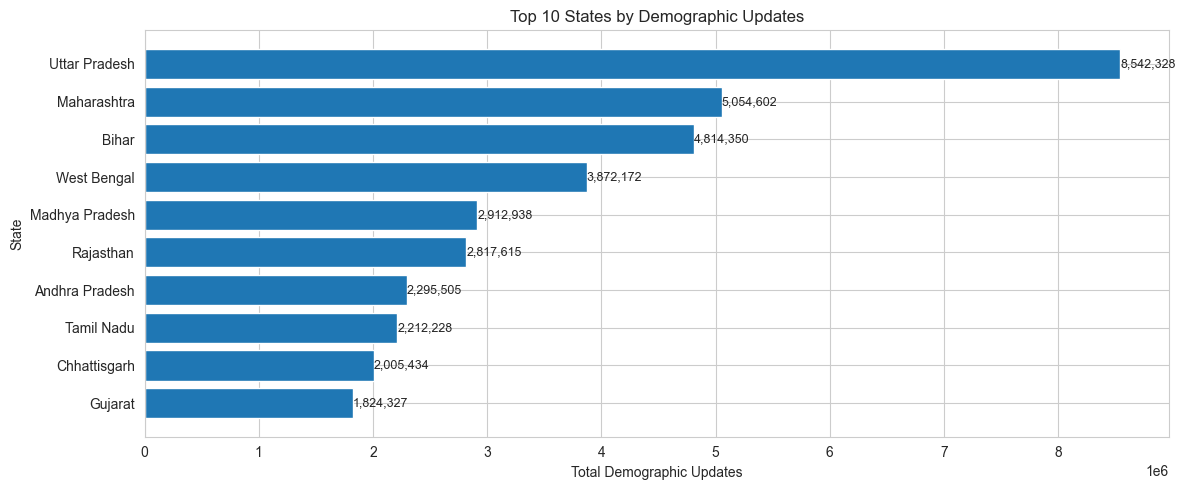

In [23]:
bars = plt.barh(
    top_demo_states["state"],
    top_demo_states["total_demographic_updates"]
)

plt.title("Top 10 States by Demographic Updates")
plt.xlabel("Total Demographic Updates")
plt.ylabel("State")
plt.gca().invert_yaxis()

# Add value labels at the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(
        width,
        bar.get_y() + bar.get_height() / 2,
        f"{int(width):,}",
        va="center",
        ha="left",
        fontsize=9
    )

plt.tight_layout()
plt.savefig("../visuals/charts/state_demographic_top10.png")
plt.show()

### Interpretation – Top 10 States by Demographic Updates

- The chart shows that demographic updates are strongly concentrated in a
few large states. **Uttar Pradesh** leads by a wide margin, indicating a
very high level of changes to Aadhaar details such as address, name, or
date of birth. This is expected due to its large population and frequent
movement of people.

- **Maharashtra** and **Bihar** follow next, showing that both urbanized and
high-population states generate significant demographic update activity.
States like **West Bengal** and **Madhya Pradesh** also contribute a large
number of updates, reflecting steady demand for demographic corrections
and updates.

- Other states such as **Rajasthan, Andhra Pradesh, Tamil Nadu, Chhattisgarh,
and Gujarat** appear lower in the top 10 list but still account for
millions of demographic updates, highlighting that this workload is
widespread and not limited to just a few regions.

Overall, the pattern indicates that demographic updates form a major and
continuous operational workload across states, particularly driven by
adult Aadhaar holders. This reinforces the need for sustained capacity
for non-biometric update services at the state level.

## Cross-Dataset Pattern Summary (State Level)

- Across all three charts, a clear and consistent pattern emerges at the
state level.

- States such as **Uttar Pradesh, Maharashtra, Bihar, and Madhya Pradesh**
appear repeatedly among the top contributors for enrolments, biometric
updates, and demographic updates. This shows that states with large
populations not only generate more new Aadhaar enrolments but also carry
a much higher ongoing update workload.

- While enrolments are largely driven by children and are concentrated in a
few states, **biometric and demographic updates are significantly larger
in volume** and remain high even in states where new enrolments are
relatively lower. This highlights that operational demand is not driven
by enrolment alone.

Overall, the comparison across datasets confirms that Aadhaar operations
are **update-intensive**, and that state-level planning must focus more on
managing biometric and demographic updates rather than only supporting
new enrolments. States with consistently high update volumes should be
prioritized for infrastructure, staffing, and service capacity planning.

## State Update Load Index

The State Update Load Index combines biometric and demographic update
volumes to quantify the overall Aadhaar update workload for each state.
This index helps identify states with higher operational pressure,
independent of new enrolment volumes.

In [24]:
# Select relevant columns
bio_updates = state_biometric[["state", "total_biometric_updates"]]
demo_updates = state_demographic[["state", "total_demographic_updates"]]

# Merge biometric and demographic updates
state_updates = pd.merge(bio_updates, demo_updates, on="state", how="inner")

state_updates.head()

,state,total_biometric_updates,total_demographic_updates
0,Andaman & Nicobar Islands,2384,1059
1,Andaman and Nicobar Islands,18314,6187
2,Andhra Pradesh,3714592,2295505
3,Arunachal Pradesh,72394,36443
4,Assam,982722,1012578


In [25]:
state_updates["state_update_load_index"] = (state_updates["total_biometric_updates"] + state_updates["total_demographic_updates"])

state_updates.sort_values("state_update_load_index", ascending=False).head(10)

,state,total_biometric_updates,total_demographic_updates,state_update_load_index
43,Uttar Pradesh,9577735,8542328,18120063
27,Maharashtra,9226139,5054602,14280741
5,Bihar,4897587,4814350,9711937
26,Madhya Pradesh,5923771,2912938,8836709
40,Tamil Nadu,4698117,2212228,6910345
38,Rajasthan,3994955,2817615,6812570
50,West Bengal,2524448,3872172,6396620
2,Andhra Pradesh,3714592,2295505,6010097
16,Gujarat,3196514,1824327,5020841
8,Chhattisgarh,2648729,2005434,4654163


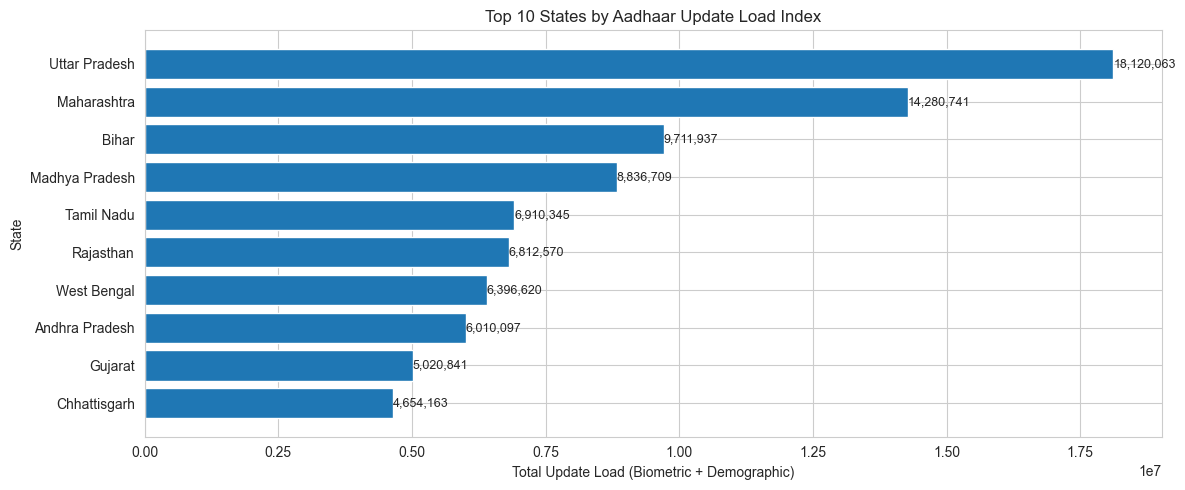

In [26]:
top_update_load_states = state_updates.sort_values("state_update_load_index", ascending=False).head(10)

bars = plt.barh(top_update_load_states["state"],top_update_load_states["state_update_load_index"])

plt.title("Top 10 States by Aadhaar Update Load Index")
plt.xlabel("Total Update Load (Biometric + Demographic)")
plt.ylabel("State")
plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()
    plt.text(width,bar.get_y() + bar.get_height() / 2, f"{int(width):,}", va="center", ha="left", fontsize=9)

plt.tight_layout()
plt.savefig("../visuals/charts/state_update_load_index_top10.png")
plt.show()

### Interpretation – State Update Load Index

- The chart shows the overall Aadhaar update workload across states by
combining both biometric and demographic updates into a single index.

- **Uttar Pradesh** clearly stands out with the highest update load, which
means it handles the largest volume of Aadhaar updates in the country.
This reflects its large population and the continuous need for both
biometric and demographic changes.

- **Maharashtra** follows next, indicating a very high and consistent update
demand despite having relatively lower new enrolments compared to some
other states. This highlights the strong lifecycle update activity in
more urbanized regions.

- States such as **Bihar, Madhya Pradesh, Tamil Nadu, and Rajasthan** also
show substantial update loads, confirming that Aadhaar maintenance
workload is not limited to just one or two states but is spread across
multiple high-population regions.

Overall, the State Update Load Index clearly shows that Aadhaar operations
are driven more by updates than by new enrolments. States with higher
update load should be prioritized for infrastructure, staffing, and
service planning to ensure smooth and efficient Aadhaar services.

## District-Level Hotspot Analysis

After national and state-level analysis, this section focuses on
district-level patterns to identify local Aadhaar operational hotspots.
The objective is to pinpoint districts with exceptionally high enrolment
and update activity that may require targeted infrastructure and
resource planning.

In [27]:
# District-wise total enrolments
district_enrolment = (enrolment_df.groupby(["state", "district"])[["age_0_5", "age_5_17", "age_18_greater"]].sum().reset_index())

district_enrolment["total_enrolments"] = (district_enrolment["age_0_5"] + district_enrolment["age_5_17"] + district_enrolment["age_18_greater"])

district_enrolment.head()

,state,district,age_0_5,age_5_17,age_18_greater,total_enrolments
0,100000,100000,0,1,217,218
1,Andaman & Nicobar Islands,Andamans,70,5,0,75
2,Andaman & Nicobar Islands,Nicobars,1,0,0,1
3,Andaman & Nicobar Islands,South Andaman,38,0,0,38
4,Andaman and Nicobar Islands,Nicobar,64,11,0,75


In [28]:
# District-wise total biometric updates
district_biometric = (biometric_df.groupby(["state", "district"])[["bio_age_5_17", "bio_age_17_"]].sum().reset_index())

district_biometric["total_biometric_updates"] = (district_biometric["bio_age_5_17"] + district_biometric["bio_age_17_"])

district_biometric.head()

,state,district,bio_age_5_17,bio_age_17_,total_biometric_updates
0,Andaman & Nicobar Islands,Andamans,343,1672,2015
1,Andaman & Nicobar Islands,Nicobars,1,1,2
2,Andaman & Nicobar Islands,South Andaman,61,306,367
3,Andaman and Nicobar Islands,Nicobar,992,819,1811
4,Andaman and Nicobar Islands,North And Middle Andaman,3780,2603,6383


In [29]:
# District-wise total demographic updates
district_demographic = (demographic_df.groupby(["state", "district"])[["demo_age_5_17", "demo_age_17_"]].sum().reset_index())

district_demographic["total_demographic_updates"] = (district_demographic["demo_age_5_17"] + district_demographic["demo_age_17_"])

district_demographic.head()

,state,district,demo_age_5_17,demo_age_17_,total_demographic_updates
0,100000,100000,0,2,2
1,Andaman & Nicobar Islands,Andamans,7,743,750
2,Andaman & Nicobar Islands,Nicobars,0,4,4
3,Andaman & Nicobar Islands,South Andaman,6,299,305
4,Andaman and Nicobar Islands,Nicobar,58,729,787


In [30]:
# Merge biometric and demographic updates at district level
district_updates = pd.merge(
    district_biometric[["state", "district", "total_biometric_updates"]],
    district_demographic[["state", "district", "total_demographic_updates"]],
    on=["state", "district"],
    how="inner"
)

# District Update Load Index
district_updates["district_update_load_index"] = (
    district_updates["total_biometric_updates"] +
    district_updates["total_demographic_updates"]
)

district_updates.head()

,state,district,total_biometric_updates,total_demographic_updates,district_update_load_index
0,Andaman & Nicobar Islands,Andamans,2015,750,2765
1,Andaman & Nicobar Islands,Nicobars,2,4,6
2,Andaman & Nicobar Islands,South Andaman,367,305,672
3,Andaman and Nicobar Islands,Nicobar,1811,787,2598
4,Andaman and Nicobar Islands,North And Middle Andaman,6383,2009,8392


In [31]:
top_districts = district_updates.sort_values("district_update_load_index", ascending=False).head(15)

top_districts

,state,district,total_biometric_updates,total_demographic_updates,district_update_load_index
546,Maharashtra,Pune,605762,438478,1044240
555,Maharashtra,Thane,571273,447253,1018526
542,Maharashtra,Nashik,576606,246100,822706
230,Gujarat,Ahmedabad,405490,267884,673374
219,Delhi,North West Delhi,325293,313989,639282
261,Gujarat,Surat,281599,357582,639181
751,Rajasthan,Jaipur,355884,275340,631224
1032,West Bengal,South 24 Parganas,224624,401137,625761
384,Karnataka,Bengaluru,297075,303924,600999
554,Maharashtra,Solapur,334507,265546,600053


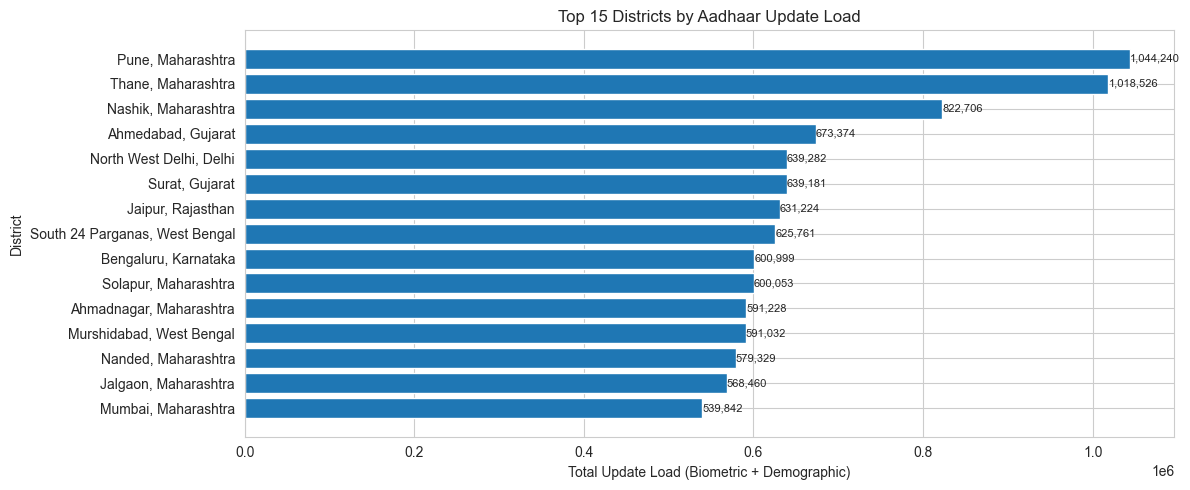

In [32]:
bars = plt.barh(top_districts["district"] + ", " + top_districts["state"], top_districts["district_update_load_index"])

plt.title("Top 15 Districts by Aadhaar Update Load")
plt.xlabel("Total Update Load (Biometric + Demographic)")
plt.ylabel("District")
plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()
    plt.text(width,bar.get_y() + bar.get_height() / 2, f"{int(width):,}", va="center", ha="left", fontsize=8)

plt.tight_layout()
plt.savefig("../visuals/charts/district_update_load_top15.png")
plt.show()

### Interpretation – District-Level Aadhaar Update Hotspots

- The chart highlights a small number of districts that account for a very
high Aadhaar update workload across the country. These districts can be
considered **operational hotspots** for Aadhaar services.

- Districts such as **Pune, Thane, and Nashik in Maharashtra** appear at the
top of the list, showing exceptionally high volumes of biometric and
demographic updates. This reflects their large populations, high urban
activity, and frequent movement of residents, which leads to regular
updates in Aadhaar records.

- Major urban and administrative districts like **Ahmedabad, North West
Delhi, Bengaluru, and Surat** also show significant update loads. These
areas typically have higher service demand due to employment-related
migration, address changes, and routine biometric updates.

- The strong presence of multiple districts from **Maharashtra and West
Bengal** indicates that update activity is not evenly distributed but
concentrated in specific regions. This suggests that state-level averages
can hide important district-level pressures.

Overall, the analysis shows that Aadhaar update demand is highly localized.
Identifying such district-level hotspots allows UIDAI to deploy resources,
staff, and infrastructure more precisely, helping reduce congestion and
improve service delivery in high-demand areas.

## District-wise Enrolment vs Update Comparison

This section compares Aadhaar enrolment volumes with update workloads
at the district level. The objective is to identify districts where
operational demand is driven primarily by new enrolments versus those
where demand is dominated by biometric and demographic updates.

In [33]:
district_enrolment_simple = district_enrolment[["state", "district", "total_enrolments"]]

district_enrolment_simple.head()

,state,district,total_enrolments
0,100000,100000,218
1,Andaman & Nicobar Islands,Andamans,75
2,Andaman & Nicobar Islands,Nicobars,1
3,Andaman & Nicobar Islands,South Andaman,38
4,Andaman and Nicobar Islands,Nicobar,75


In [34]:
district_comparison = pd.merge(district_enrolment_simple, district_updates[["state", "district", "district_update_load_index"]], on=["state", "district"],how="inner")

district_comparison.head()

,state,district,total_enrolments,district_update_load_index
0,Andaman & Nicobar Islands,Andamans,75,2765
1,Andaman & Nicobar Islands,Nicobars,1,6
2,Andaman & Nicobar Islands,South Andaman,38,672
3,Andaman and Nicobar Islands,Nicobar,75,2598
4,Andaman and Nicobar Islands,North And Middle Andaman,132,8392


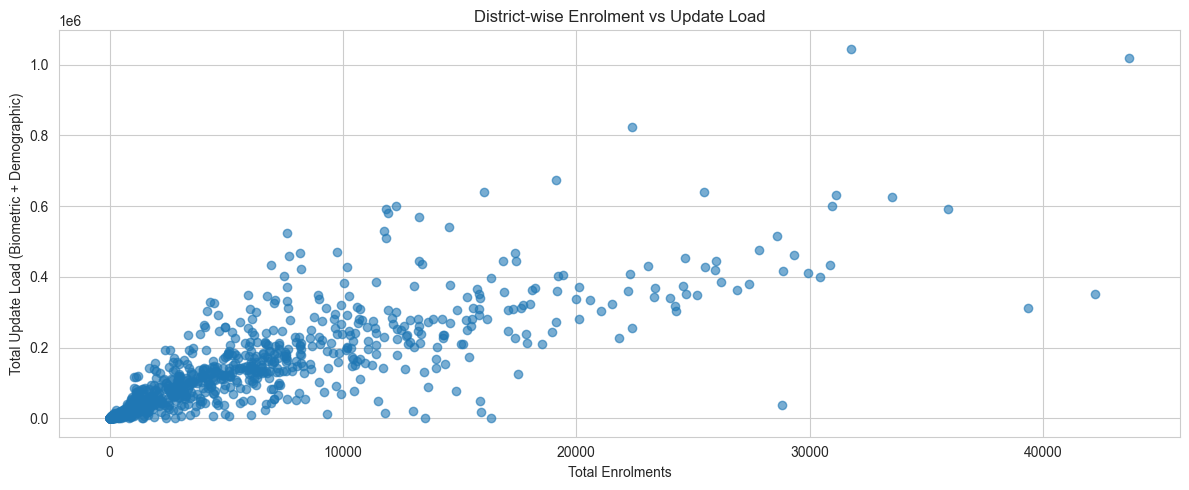

In [36]:
plt.scatter(district_comparison["total_enrolments"],district_comparison["district_update_load_index"],alpha=0.6)

plt.title("District-wise Enrolment vs Update Load")
plt.xlabel("Total Enrolments")
plt.ylabel("Total Update Load (Biometric + Demographic)")

plt.tight_layout()
plt.savefig("../visuals/charts/district_enrolment_vs_update.png")
plt.show()

### Interpretation – District-wise Enrolment vs Update Load

- The scatter plot shows the relationship between total Aadhaar enrolments
and total update load at the district level. While there is a general
trend where districts with higher enrolments tend to have higher update
loads, the relationship is not strong or uniform.

- A large number of districts appear on the lower left side of the chart,
indicating low enrolments and low update activity. However, there are
several districts with **moderate enrolment levels but very high update
loads**, visible as points higher up on the chart. These districts
experience significant operational pressure despite not creating many
new Aadhaar IDs.

- There are also a few districts with very high enrolments, but their
update load does not increase proportionally. This suggests that new
enrolments alone are not a reliable indicator of ongoing Aadhaar service
demand.

Overall, the plot highlights that Aadhaar operations at the district
level are largely **update-driven**. Planning resources based only on
enrolment numbers may overlook districts that face heavy update
workloads, leading to service bottlenecks.

In [38]:
district_comparison["enrolment_norm"] = (district_comparison["total_enrolments"] / district_comparison["total_enrolments"].max())

district_comparison["update_norm"] = (district_comparison["district_update_load_index"] / district_comparison["district_update_load_index"].max())

In [39]:
district_comparison["update_enrol_gap"] = (district_comparison["update_norm"] - district_comparison["enrolment_norm"])

In [40]:
high_update_low_enrol = district_comparison.sort_values("update_enrol_gap", ascending=False).head(10)

high_update_low_enrol[["state", "district", "total_enrolments", "district_update_load_index", "update_enrol_gap"]]

,state,district,total_enrolments,district_update_load_index,update_enrol_gap
555,Maharashtra,Yavatmal,7594,523299,0.327306
505,Maharashtra,Ahmadnagar,11836,591228,0.295259
550,Maharashtra,Solapur,12292,600053,0.293273
535,Maharashtra,Nanded,11947,579329,0.281323
538,Maharashtra,Nashik,22368,822706,0.275857
542,Maharashtra,Pune,31763,1044240,0.272958
17,Andhra Pradesh,East Godavari,7678,457875,0.262731
46,Andhra Pradesh,Visakhapatnam,8178,468496,0.261457
508,Maharashtra,Amravati,6915,434474,0.257786
217,Delhi,North West Delhi,16043,639282,0.244981


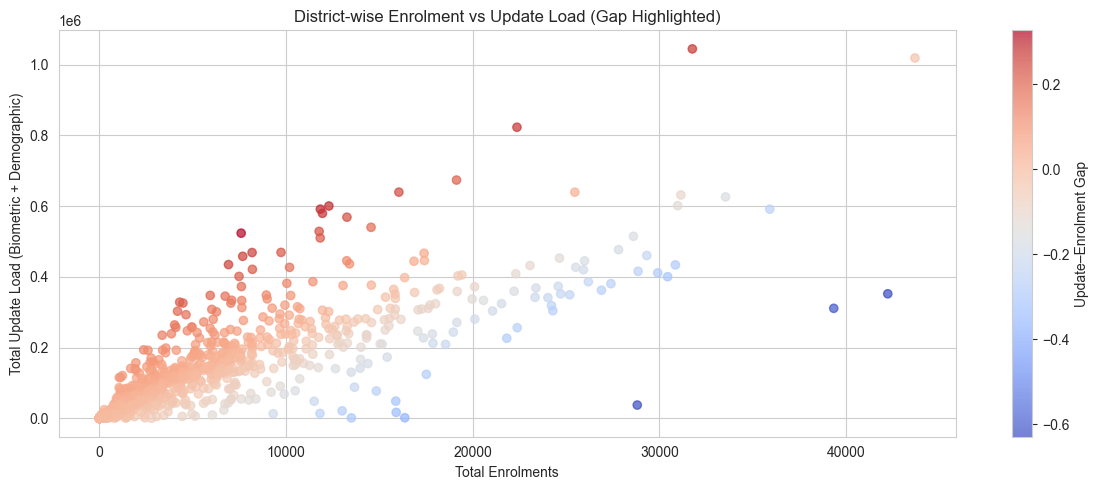

In [42]:
plt.scatter(
    district_comparison["total_enrolments"],
    district_comparison["district_update_load_index"],
    c=district_comparison["update_enrol_gap"],
    cmap="coolwarm",
    alpha=0.7
)

plt.colorbar(label="Update–Enrolment Gap")

plt.title("District-wise Enrolment vs Update Load (Gap Highlighted)")
plt.xlabel("Total Enrolments")
plt.ylabel("Total Update Load (Biometric + Demographic)")

plt.tight_layout()
plt.savefig("../visuals/charts/district_update_enrol_gap_scatter.png")
plt.show()

### Interpretation – Update–Enrolment Gap (District Level)

- This scatter plot compares total Aadhaar enrolments with total update load
at the district level, while highlighting the **gap between updates and
enrolments** using color.

- Districts shown in **red shades** represent areas where the update load is
high relative to the number of new enrolments. These districts experience
strong ongoing demand for biometric and demographic updates, even though
they are not major centres of new Aadhaar creation.

- Districts shown in **blue shades** represent enrolment-heavy areas, where
new Aadhaar registrations are relatively high but update demand is lower
in comparison. These districts are more focused on enrolment services
rather than maintenance activities.

- Most districts cluster around the middle of the plot, indicating a
balanced relationship between enrolments and updates. However, the
presence of clearly red and blue outliers shows that operational demand
varies significantly across districts.

Overall, the visualization confirms that Aadhaar service demand cannot be
understood using enrolment numbers alone. Districts with a high
update–enrolment gap should be prioritized for targeted update
infrastructure, staffing, and service optimization.

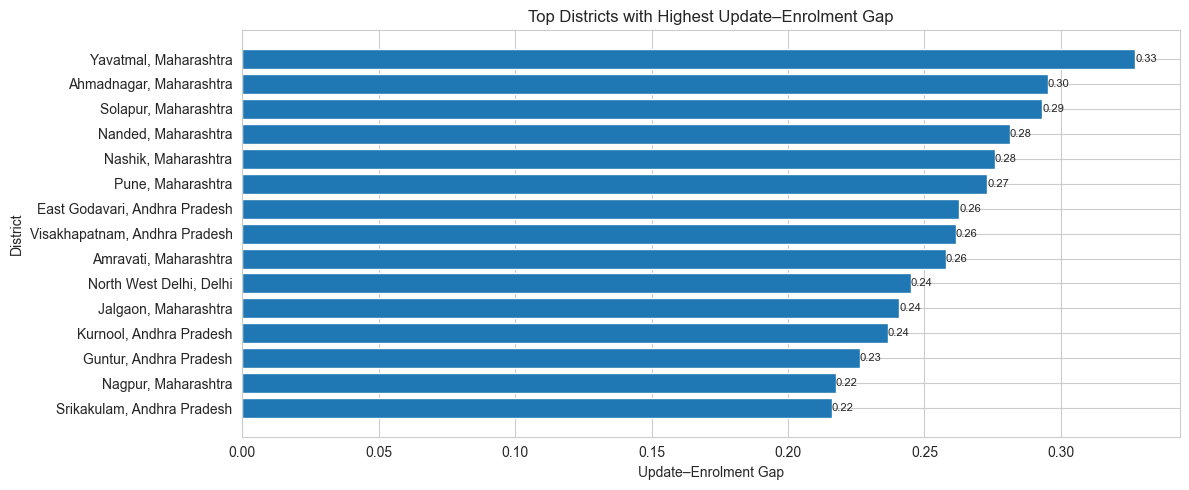

In [45]:
top_gap_districts = district_comparison.sort_values("update_enrol_gap", ascending=False).head(15)

bars = plt.barh(top_gap_districts["district"] + ", " + top_gap_districts["state"], top_gap_districts["update_enrol_gap"])

plt.title("Top Districts with Highest Update–Enrolment Gap")
plt.xlabel("Update–Enrolment Gap")
plt.ylabel("District")
plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()
    plt.text(width,bar.get_y() + bar.get_height()/2, f"{width:.2f}", va="center", ha="left", fontsize=8)

plt.tight_layout()
plt.savefig("../visuals/charts/district_update_enrol_gap_top15.png")
plt.show()

### Interpretation – Top 15 Districts by Aadhaar Update Load

- This chart highlights the districts with the highest overall Aadhaar
update workload, combining both biometric and demographic updates.

- **Pune, Thane, and Nashik in Maharashtra** clearly stand out at the top,
showing that a few districts within the same state can carry a very large
share of the total update burden. This reflects high population density,
urbanization, and frequent life events such as migration and address
changes.

- Major urban and administrative districts like **Ahmedabad, North West
Delhi, Bengaluru, Surat, and Jaipur** also appear among the top update
hotspots. These areas typically experience higher demand for Aadhaar
updates due to employment-driven movement, documentation changes, and
regular biometric refresh needs.

- The strong presence of multiple districts from **Maharashtra and West
Bengal** shows that Aadhaar update activity is not evenly spread within
states but is concentrated in specific districts. This means state-level
averages may hide significant local pressure points.

Overall, the chart confirms that Aadhaar operations are highly
**district-specific**. Identifying these high-load districts is crucial
for targeted deployment of resources, staffing, and service centers to
reduce congestion and improve service delivery.